In [1]:
# Define the tools we are going to need today
%matplotlib inline
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xray  # NetCDF library
import cartopy  # Plotting libary
import cartopy.crs as ccrs  # Projections
# Some defaults
plt.rcParams['figure.figsize'] = (14, 5)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are not important
import warnings
warnings.filterwarnings('ignore')

In [2]:
netcdf = xray.open_dataset('/media/cklein/Elements/sens_stud/files/ERA/ERA_prcp_monthly_79-2013.nc')

In [6]:
t2_var= (netcdf.tp)*24.
t2_avg = netcdf.tp.mean(dim='time')
t2=t2_var.sel(time=slice('1999-08-01','1999-08-31'))

In [8]:
t2.time

<xarray.DataArray 'time' (time: 2)>
array(['1999-08-01T13:00:00.000000000+0100',
       '1999-08-02T01:00:00.000000000+0100'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-08-01T12:00:00 1999-08-02
Attributes:
    long_name: time

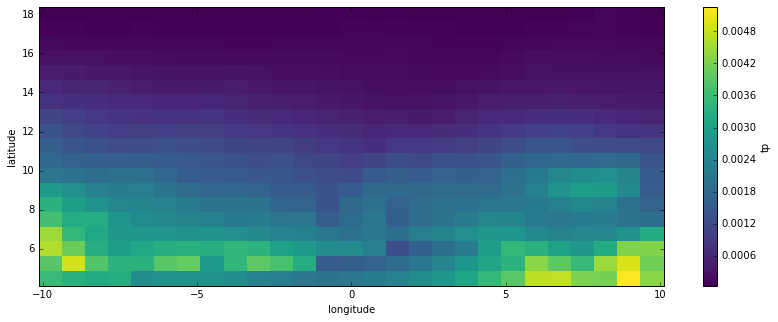

In [63]:
box=t2_avg.sel(latitude=slice(18, 4), longitude=slice(-10,10))
box.plot()

In [30]:
t2_var.mean()

<xarray.DataArray 'tp' ()>
array(0.022952151564470346)

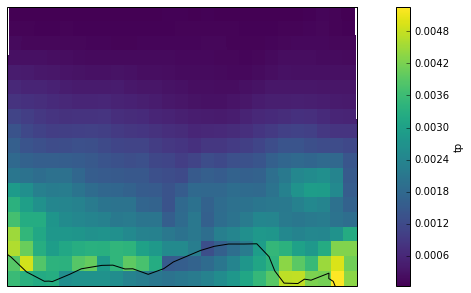

In [64]:
# Define the map projection.
ax = plt.axes(projection=ccrs.Robinson())
# ax is an empty plot. We now plot the variable t2_avg onto ax
box.plot(ax=ax, transform=ccrs.PlateCarree()) 
# The keywords "origin" and "transform" are projection details 
# The keyword aspect just ensures that the plot aspect ratio is preserved
ax.coastlines();  # Add coastlines to the plot

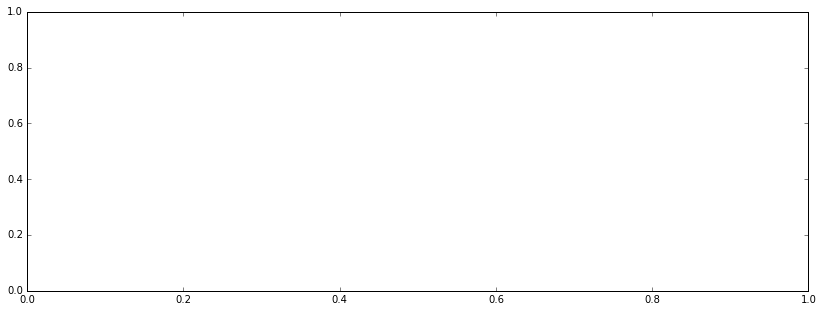